In [1]:
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

In [2]:
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")

In [3]:
meta = ag3.sample_metadata(sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
meta

Load sample metadata:   0%|          | 0/13 [00:00<?, ?it/s]

sample_id partner_sample_id    contributor       country   
0                    AB0085-Cx             BF2-4    Austin Burt  Burkina Faso  \
1                    AB0086-Cx             BF2-6    Austin Burt  Burkina Faso   
2                     AB0087-C             BF3-3    Austin Burt  Burkina Faso   
3                     AB0088-C             BF3-5    Austin Burt  Burkina Faso   
4                    AB0089-Cx             BF3-8    Austin Burt  Burkina Faso   
...                        ...               ...            ...           ...   
1212  VBS02119-4431STDY6772831            kl0831  Nora Besansky          Mali   
1213  VBS02121-4431STDY6772832            kl0836  Nora Besansky          Mali   
1214  VBS02127-4431STDY6772833            kl0869  Nora Besansky          Mali   
1215  VBS02129-4431STDY6772835            kl0884  Nora Besansky          Mali   
1216  VBS02130-4431STDY6772836            kl0886  Nora Besansky          Mali   

          location  year  month  latitude  longitude sex_call  ...   
0             Pala  2012      7    11.151     -4.235        F  ...  \
1             Pala  2012      7    11.151     -4.235        F  ...   
2     Bana Village  2012      7    11.233     -4.472        F  ...   
3     Bana Village  2012      7    11.233     -4.472        F  ...   
4     Bana Village  2012      7    11.233     -4.472        F  ...   
...            ...   ...    ...       ...        ...      ...  ...   
1212          Kela  2004      8    11.880     -8.450        F  ...   
1213          Kela  2004      8    11.880     -8.450        F  ...   
1214          Kela  2004      8    11.880     -8.450        F  ...   
1215          Kela  2004      8    11.880     -8.450        F  ...   
1216          Kela  2004      8    11.880     -8.450        F  ...   

        admin1_name admin1_iso  admin2_name     taxon  cohort_admin1_year   
0     Hauts-Bassins      BF-09        Houet   gambiae     BF-09_gamb_2012  \
1     Hauts-Bassins      BF-09        Houet   gambiae     BF-09_gamb_2012   
2     Hauts-Bassins      BF-09        Houet  coluzzii     BF-09_colu_2012   
3     Hauts-Bassins      BF-09        Houet  coluzzii     BF-09_colu_2012   
4     Hauts-Bassins      BF-09        Houet  coluzzii     BF-09_colu_2012   
...             ...        ...          ...       ...                 ...   
1212     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1213     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1214     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1215     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1216     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   

      cohort_admin1_month cohort_admin1_quarter      cohort_admin2_year   
0      BF-09_gamb_2012_07    BF-09_gamb_2012_Q3   BF-09_Houet_gamb_2012  \
1      BF-09_gamb_2012_07    BF-09_gamb_2012_Q3   BF-09_Houet_gamb_2012   
2      BF-09_colu_2012_07    BF-09_colu_2012_Q3   BF-09_Houet_colu_2012   
3      BF-09_colu_2012_07    BF-09_colu_2012_Q3   BF-09_Houet_colu_2012   
4      BF-09_colu_2012_07    BF-09_colu_2012_Q3   BF-09_Houet_colu_2012   
...                   ...                   ...                     ...   
1212    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1213    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1214    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1215    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1216    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   

            cohort_admin2_month      cohort_admin2_quarter  
0      BF-09_Houet_gamb_2012_07   BF-09_Houet_gamb_2012_Q3  
1      BF-09_Houet_gamb_2012_07   BF-09_Houet_gamb_2012_Q3  
2      BF-09_Houet_colu_2012_07   BF-09_Houet_colu_2012_Q3  
3      BF-09_Houet_colu_2012_07   BF-09_Houet_colu_2012_Q3  
4      BF-09_Houet_colu_2012_07   BF-09_Houet_colu_2012_Q3  
...            

In [4]:
meta = meta[meta.taxon != 'aim_species']
meta

sample_id partner_sample_id    contributor       country   
0                    AB0085-Cx             BF2-4    Austin Burt  Burkina Faso  \
1                    AB0086-Cx             BF2-6    Austin Burt  Burkina Faso   
2                     AB0087-C             BF3-3    Austin Burt  Burkina Faso   
3                     AB0088-C             BF3-5    Austin Burt  Burkina Faso   
4                    AB0089-Cx             BF3-8    Austin Burt  Burkina Faso   
...                        ...               ...            ...           ...   
1212  VBS02119-4431STDY6772831            kl0831  Nora Besansky          Mali   
1213  VBS02121-4431STDY6772832            kl0836  Nora Besansky          Mali   
1214  VBS02127-4431STDY6772833            kl0869  Nora Besansky          Mali   
1215  VBS02129-4431STDY6772835            kl0884  Nora Besansky          Mali   
1216  VBS02130-4431STDY6772836            kl0886  Nora Besansky          Mali   

          location  year  month  latitude  longitude sex_call  ...   
0             Pala  2012      7    11.151     -4.235        F  ...  \
1             Pala  2012      7    11.151     -4.235        F  ...   
2     Bana Village  2012      7    11.233     -4.472        F  ...   
3     Bana Village  2012      7    11.233     -4.472        F  ...   
4     Bana Village  2012      7    11.233     -4.472        F  ...   
...            ...   ...    ...       ...        ...      ...  ...   
1212          Kela  2004      8    11.880     -8.450        F  ...   
1213          Kela  2004      8    11.880     -8.450        F  ...   
1214          Kela  2004      8    11.880     -8.450        F  ...   
1215          Kela  2004      8    11.880     -8.450        F  ...   
1216          Kela  2004      8    11.880     -8.450        F  ...   

        admin1_name admin1_iso  admin2_name     taxon  cohort_admin1_year   
0     Hauts-Bassins      BF-09        Houet   gambiae     BF-09_gamb_2012  \
1     Hauts-Bassins      BF-09        Houet   gambiae     BF-09_gamb_2012   
2     Hauts-Bassins      BF-09        Houet  coluzzii     BF-09_colu_2012   
3     Hauts-Bassins      BF-09        Houet  coluzzii     BF-09_colu_2012   
4     Hauts-Bassins      BF-09        Houet  coluzzii     BF-09_colu_2012   
...             ...        ...          ...       ...                 ...   
1212     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1213     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1214     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1215     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   
1216     Koulikouro       ML-2      Kangaba   gambiae      ML-2_gamb_2004   

      cohort_admin1_month cohort_admin1_quarter      cohort_admin2_year   
0      BF-09_gamb_2012_07    BF-09_gamb_2012_Q3   BF-09_Houet_gamb_2012  \
1      BF-09_gamb_2012_07    BF-09_gamb_2012_Q3   BF-09_Houet_gamb_2012   
2      BF-09_colu_2012_07    BF-09_colu_2012_Q3   BF-09_Houet_colu_2012   
3      BF-09_colu_2012_07    BF-09_colu_2012_Q3   BF-09_Houet_colu_2012   
4      BF-09_colu_2012_07    BF-09_colu_2012_Q3   BF-09_Houet_colu_2012   
...                   ...                   ...                     ...   
1212    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1213    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1214    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1215    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   
1216    ML-2_gamb_2004_08     ML-2_gamb_2004_Q3  ML-2_Kangaba_gamb_2004   

            cohort_admin2_month      cohort_admin2_quarter  
0      BF-09_Houet_gamb_2012_07   BF-09_Houet_gamb_2012_Q3  
1      BF-09_Houet_gamb_2012_07   BF-09_Houet_gamb_2012_Q3  
2      BF-09_Houet_colu_2012_07   BF-09_Houet_colu_2012_Q3  
3      BF-09_Houet_colu_2012_07   BF-09_Houet_colu_2012_Q3  
4      BF-09_Houet_colu_2012_07   BF-09_Houet_colu_2012_Q3  
...            

-----------------------------------
## Chromosome X

In [5]:
gt = ag3.snp_genotypes("X", sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
                                       "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
gt

<GenotypeDaskArray shape=(23385349, 1217, 2) dtype=int8>

In [6]:
sel1 = np.array([True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])
sel2 = np.array([True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])

In [7]:
gt = gt.subset(sel1 = sel1)
gt = gt.subset(sel1 = sel2)

In [8]:
filter_pass = ag3.site_filters("X", mask="gamb_colu")
filter_pass

dask.array<array, shape=(23385349,), dtype=bool, chunksize=(300000,), chunktype=numpy.ndarray>

In [11]:
pos = ag3.snp_sites(region="X", field='POS')
pos

dask.array<array, shape=(23385349,), dtype=int32, chunksize=(524288,), chunktype=numpy.ndarray>

In [12]:
pos.compute()

array([       1,        2,        3, ..., 24393106, 24393107, 24393108],
      dtype=int32)

In [13]:
loci = (pos >= 15_000_000) & (pos <= 24_000_000)
loci = loci.compute()

In [14]:
f = filter_pass.compute()
f = f[loci]

In [15]:
gt_X = gt.subset(sel0=loci)
gt_X

<GenotypeDaskArray shape=(8303900, 1190, 2) dtype=int8>

In [16]:
gt_X = gt_X.subset(sel0=f)
gt_X

<GenotypeDaskArray shape=(4886224, 1190, 2) dtype=int8>

In [17]:
maf_min = 0.01
r2_value = 0.1
downsample_n = 100000

In [18]:
alleles = gt_X.count_alleles()

In [19]:
biallelic = alleles.max_allele() <= 1
g = gt_X.compress(biallelic, axis=0)

In [20]:
freqs = g.count_alleles().to_frequencies()
maf_ok = np.min(np.array(freqs), axis=1) >= maf_min
g = g.compress(maf_ok, axis=0)
pos = np.compress(maf_ok, pos, axis=0)

In [21]:
if pos.size > downsample_n:
        print("Downsampling... to {0} from {1}".format(downsample_n, pos.size))
        idx = np.random.choice(np.arange(0, pos.size), downsample_n, False)
        idx.sort()
        pos = np.take(pos, idx)
        g = g.take(idx, axis=0)

In [22]:
g_tot = g.compute()
g_tot

<GenotypeArray shape=(47085, 1190, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/1 0/1 0/0 0/1 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
1/1 1/1 0/0 0/0 0/0 ... 1/1 0/1 0/1 0/1 1/1

In [3]:
import h5py
from allel import chunked

In [ ]:
import h5py
from allel import chunked
h5f = h5py.File('chrom_X-spe_west.h5', mode='w')
h5g = h5f.create_group('X')
chunked.copy(g_tot, storage='hdf5', group=h5g, name='calldata')
h5f.close()

In [ ]:
h5f.close()

-----------------------------------
## PCA

In [17]:
meta = pd.read_excel('../Data/Meta/meta_new_3_0.xlsx', sheet_name="meta3.0")
meta.head()

sample_id partner_sample_id  contributor       country location  year   
0  AB0085-Cx             BF2-4  Austin Burt  Burkina Faso     Pala  2012  \
1  AB0086-Cx             BF2-6  Austin Burt  Burkina Faso     Pala  2012   
2   AB0087-C             BF3-3  Austin Burt  Burkina Faso     Bana  2012   
3   AB0088-C             BF3-5  Austin Burt  Burkina Faso     Bana  2012   
4  AB0089-Cx             BF3-8  Austin Burt  Burkina Faso     Bana  2012   

   month  longitude  latitude sex_call  ... pca_pops pca_country   
0      7     -4.235    11.150        F  ...   An.gam       BFgam  \
1      7     -4.235    11.150        F  ...   An.gam       BFgam   
2      7     -4.472    11.233        F  ...   An.col       BFcol   
3      7     -4.472    11.233        F  ...   An.col       BFcol   
4      7     -4.472    11.233        F  ...   An.col       BFcol   

   aim_species_fraction_colu_no2l     taxon cohort_admin1_year   
0                        0.016488   gambiae    BF-09_gamb_2012  \
1                        0.026316   gambiae    BF-09_gamb_2012   
2                        0.981007  coluzzii    BF-09_colu_2012   
3                        0.987593  coluzzii    BF-09_colu_2012   
4                        0.973597  coluzzii    BF-09_colu_2012   

  cohort_admin1_month cohort_admin1_quarter     cohort_admin2_year   
0  BF-09_gamb_2012_07    BF-09_gamb_2012_Q3  BF-09_Houet_gamb_2012  \
1  BF-09_gamb_2012_07    BF-09_gamb_2012_Q3  BF-09_Houet_gamb_2012   
2  BF-09_colu_2012_07    BF-09_colu_2012_Q3  BF-09_Houet_colu_2012   
3  BF-09_colu_2012_07    BF-09_colu_2012_Q3  BF-09_Houet_colu_2012   
4  BF-09_colu_2012_07    BF-09_colu_2012_Q3  BF-09_Houet_colu_2012   

        cohort_admin2_month     cohort_admin2_quarter  
0  BF-09_Houet_gamb_2012_07  BF-09_Houet_gamb_2012_Q3  
1  BF-09_Houet_gamb_2012_07  BF-09_Houet_gamb_2012_Q3  
2  BF-09_Houet_colu_2012_07  BF-09_Houet_colu_2012_Q3  
3  BF-09_Houet_colu_2012_07  BF-09_Houet_colu_2012_Q3  
4  BF-09_Houet_colu_2012_07  BF-09_Houet_colu_2012_Q3  

[5 rows x 31 columns]

In [7]:
callset_fn = '/media/randomx/Volume/Ag1000G/Phase3/Data/Extras/chrom_X-spe_west.h5'
callset = h5py.File(callset_fn, mode='r')
g_tot = allel.GenotypeChunkedArray(callset['X']['calldata'])
g_tot

<GenotypeChunkedArray shape=(47085, 1190, 2) dtype=int8 chunks=(440, 1190, 2)
   nbytes=106.9M cbytes=107.9M cratio=1.0
   values=h5py._hl.dataset.Dataset>

In [8]:
ac = g_tot.count_alleles()[:]
ac

<AlleleCountsArray shape=(47085, 2) dtype=int32>
2275  103
2321   53
2345   35
...
2300   80
2302   78
1171 1209

In [9]:
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 1)
gf = g_tot.compress(flt, axis=0)
gf

<GenotypeChunkedArray shape=(47085, 1190, 2) dtype=int8 chunks=(368, 1190, 2)
   nbytes=106.9M cbytes=14.1M cratio=7.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [10]:
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(47085, 1190) dtype=int8 chunks=(736, 1190)
   nbytes=53.4M cbytes=9.7M cratio=5.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [11]:
def ld_prune(gn, gf, size, step, threshold=.1, n_iter=1):
    for i in range(n_iter):
        loc_unlinked = allel.locate_unlinked(gn, size=size, step=step, threshold=threshold)
        n = np.count_nonzero(loc_unlinked)
        n_remove = gn.shape[0] - n
        print('iteration', i+1, 'retaining', n, 'removing', n_remove, 'variants')
        gn = gn.compress(loc_unlinked, axis=0)
        gf = gf.compress(loc_unlinked, axis=0)
    return gn, gf

In [12]:
gnu, loc_unlinked = ld_prune(gn, gf, size=500, step=200, threshold=.1, n_iter=5)

iteration 1 retaining 10781 removing 36304 variants
iteration 2 retaining 9100 removing 1681 variants
iteration 3 retaining 8940 removing 160 variants
iteration 4 retaining 8896 removing 44 variants
iteration 5 retaining 8885 removing 11 variants


ped file based on ld pruning

In [13]:
g_tot_pruned = loc_unlinked
g_tot_pruned

<GenotypeChunkedArray shape=(8885, 1190, 2) dtype=int8 chunks=(278, 1190, 2)
   nbytes=20.2M cbytes=2.2M cratio=9.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [155]:
import gzip
fn = ("../Data/Extras/chrom_X-spe_west_pruned.ped.gz")
with gzip.open(fn, "wb") as gz:
    for i, sid in enumerate(fh_samples):
        sex = sex_d[dat.loc[sid].sex_call]
        geno = np.array(g_tot_pruned[:, i] + 1)
        geno_str = " ".join(np.apply_along_axis(" ".join, 1, geno.astype("str")))
        line = " ".join([sid, sid, "0", "0", sex, "0", geno_str]) + "\n"
        gz.write(line.encode())

------
#### PCA

In [14]:
coords, model = allel.pca(gnu, n_components=10, scaler='patterson')

In [18]:
meta.pca_pops.unique()

array(['An.gam', 'An.col', 'gcx1-GM', 'gcx2', 'gcx1-GW'], dtype=object)

In [19]:
pop_colours = {
'An.gam': '#1838DE',
'An.col': '#FF0000',
'gcx2': '#FFA500',
'gcx1-GW': '#98FB98',
'gcx1-GM': '#008000',
}


In [20]:
species_markers = {
    'An.gam': '.',
    'An.col': '.',
    'gcx2': '.',
    'gcx1-GM': '.',
    'gcx1-GW': '.',
}

In [21]:
populations = ['An.gam', 'An.col', 'gcx1-GM', 'gcx2', 'gcx1-GW']

In [22]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='.', linestyle='', mec=pop_colours[pop], mfc='none', mew=3.0, label=pop, markersize=8)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = meta.pca_pops.values
    fig, ax = plt.subplots()
    y = model.explained_variance_
    x = np.arange(1, len(y)+1)
    ax.plot(x, y, 'ko')
    ax.set_xticks(x)
    ax.set_xlabel('principal component')
    ax.set_ylabel('variance explained')
    ax.grid(axis='x')
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(2, 3, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(2, 3, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax = fig.add_subplot(2, 3, 3)
    plot_pca_coords(coords, model, 4, 5, ax, sample_population)
    ax = fig.add_subplot(2, 3, 4)
    plot_pca_coords(coords, model, 6, 7, ax, sample_population)
    ax = fig.add_subplot(2, 3, 5)
    plot_pca_coords(coords, model, 8, 9, ax, sample_population)

    #ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

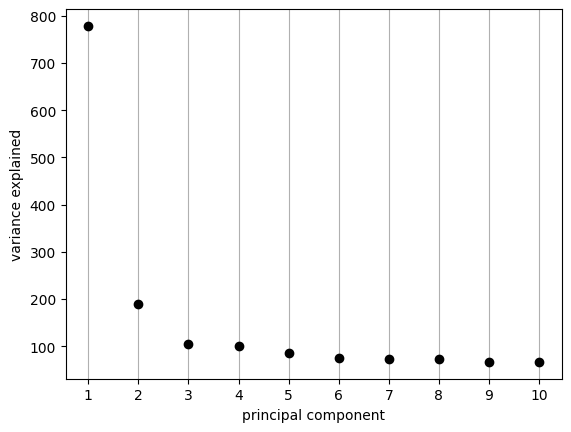

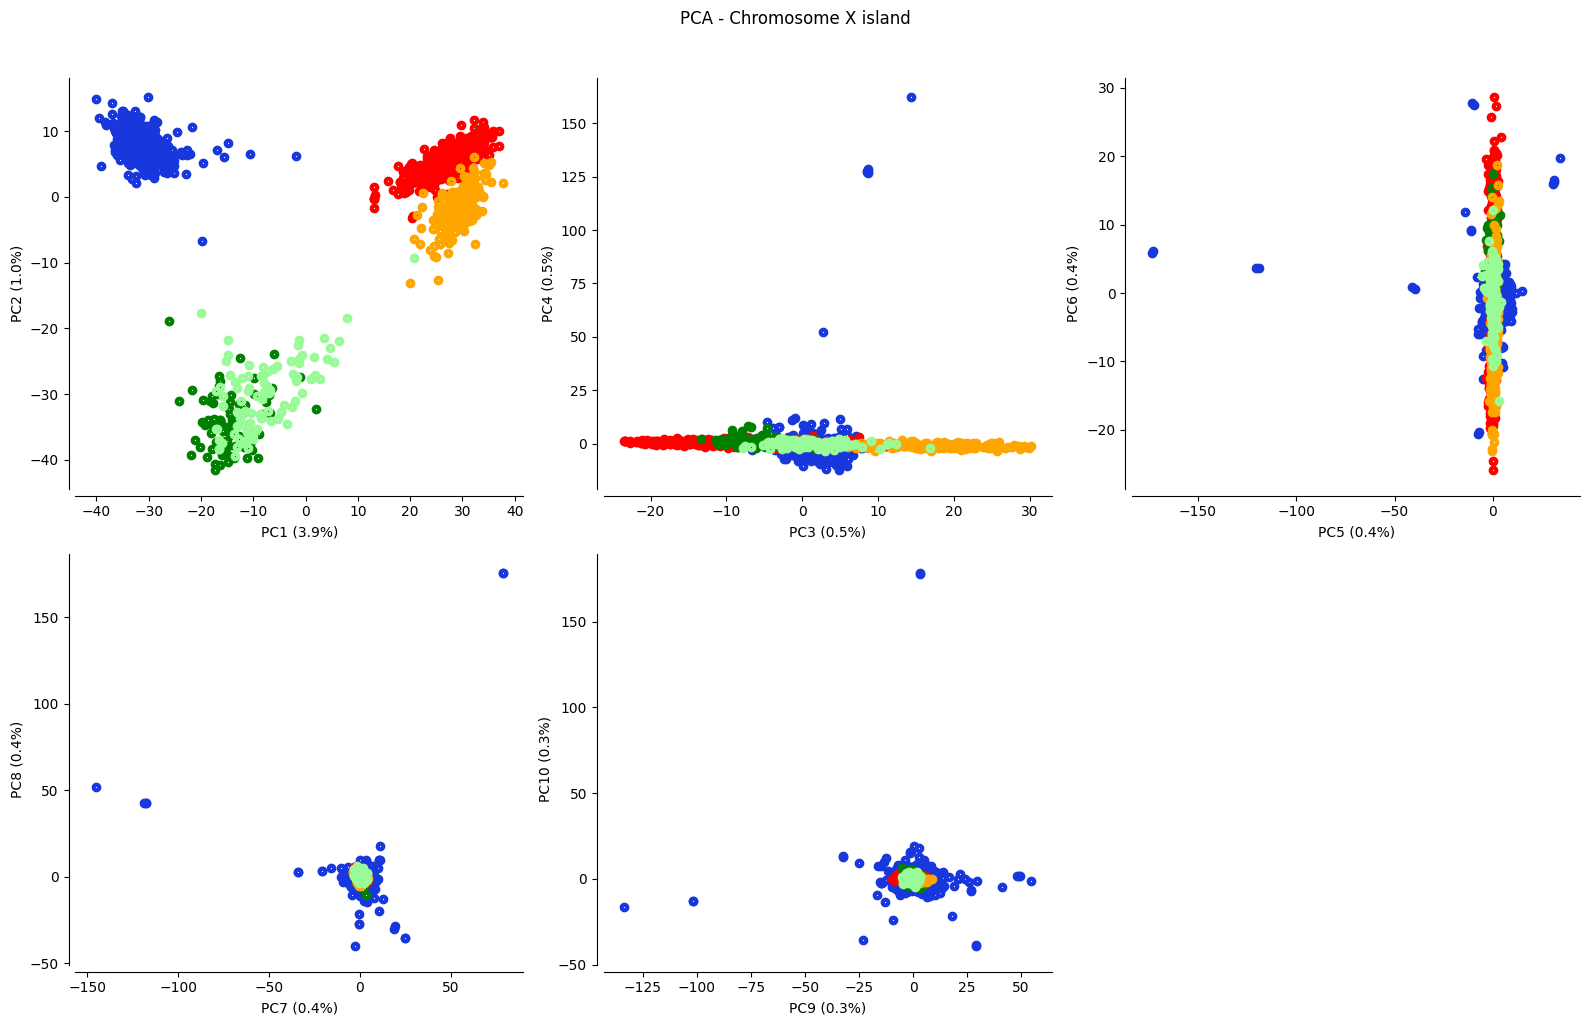

In [23]:
fig_pca(coords, model, 'PCA - Chromosome X island')

In [24]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='.', linestyle='', mec=pop_colours[pop], mfc='none', mew=5.0, label=pop, markersize=10)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = meta.pca_pops.values
    fig, ax = plt.subplots()
    y = model.explained_variance_
    x = np.arange(1, len(y)+1)
    ax.plot(x, y, 'ko')
    ax.set_xticks(x)
    ax.set_xlabel('principal component')
    ax.set_ylabel('variance explained')
    ax.grid(axis='x')
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(26, 15))
    ax = fig.add_subplot(2, 3, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    #ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

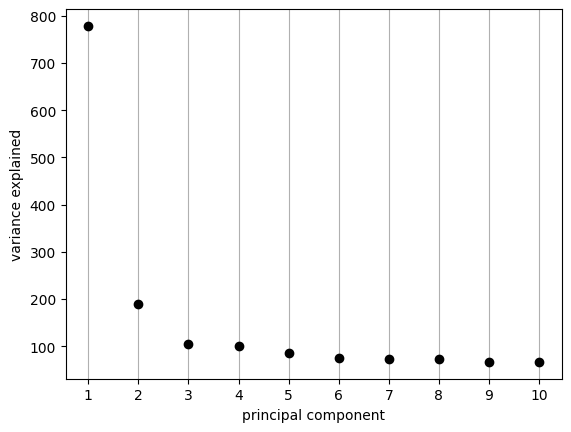

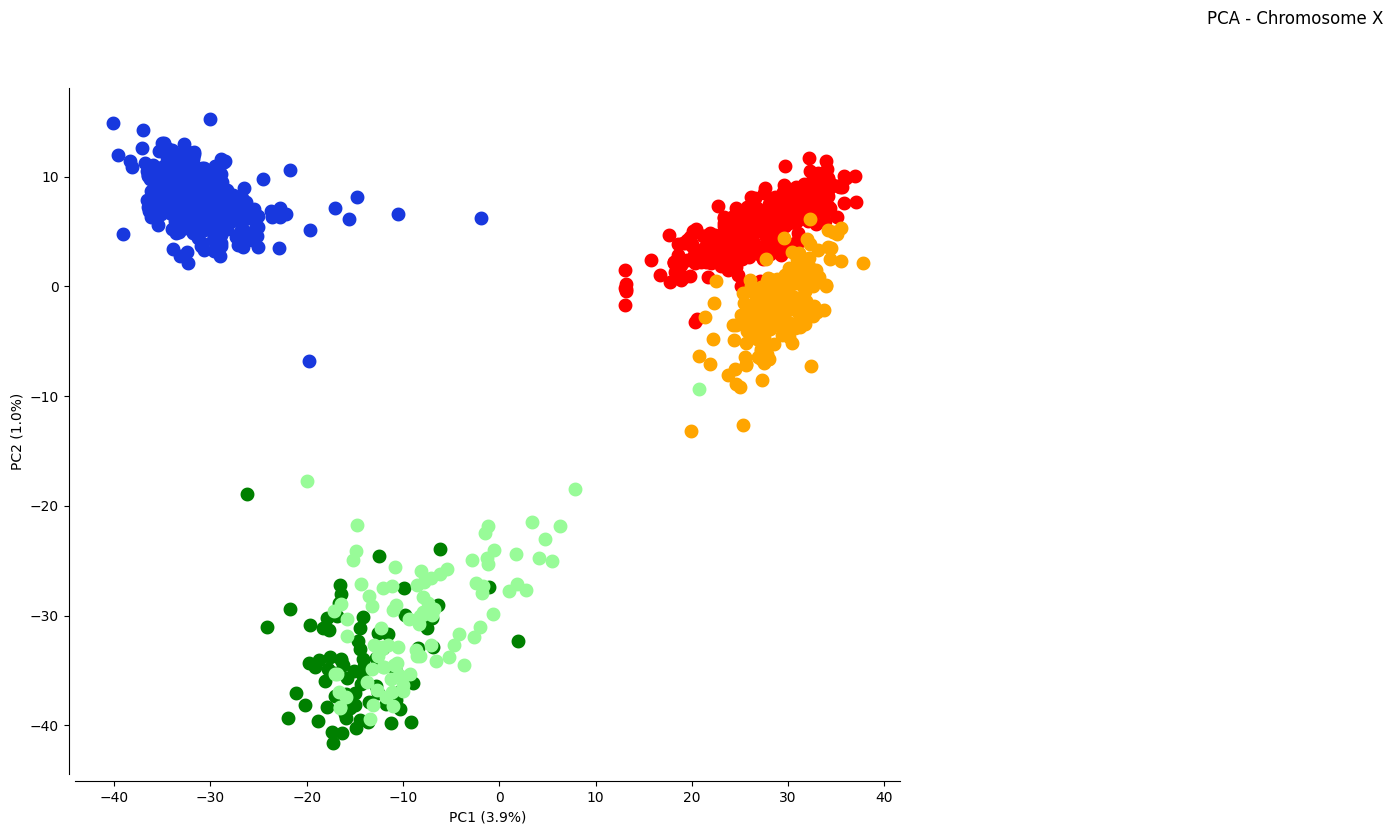

In [25]:
fig_pca(coords, model, 'PCA - Chromosome X')

--------------------------------------
## PCA by AIMs fraction

In [29]:
data = meta.copy()
for i in range(3):
    data[f'PC{i+1}'] = coords[:, i]
    # save results
    evr = model.explained_variance_ratio_
    data.to_csv('chrx_island_pca_final.csv', index=False)
    np.save('chrx_island_pca_final.npy', evr)

In [27]:
import hashlib
import json


def hash_params(*args, **kwargs):
    o = {
        'args': args,
        'kwargs': kwargs
    }
    s = json.dumps(o).encode()
    h = hashlib.md5(s).hexdigest()
    return h


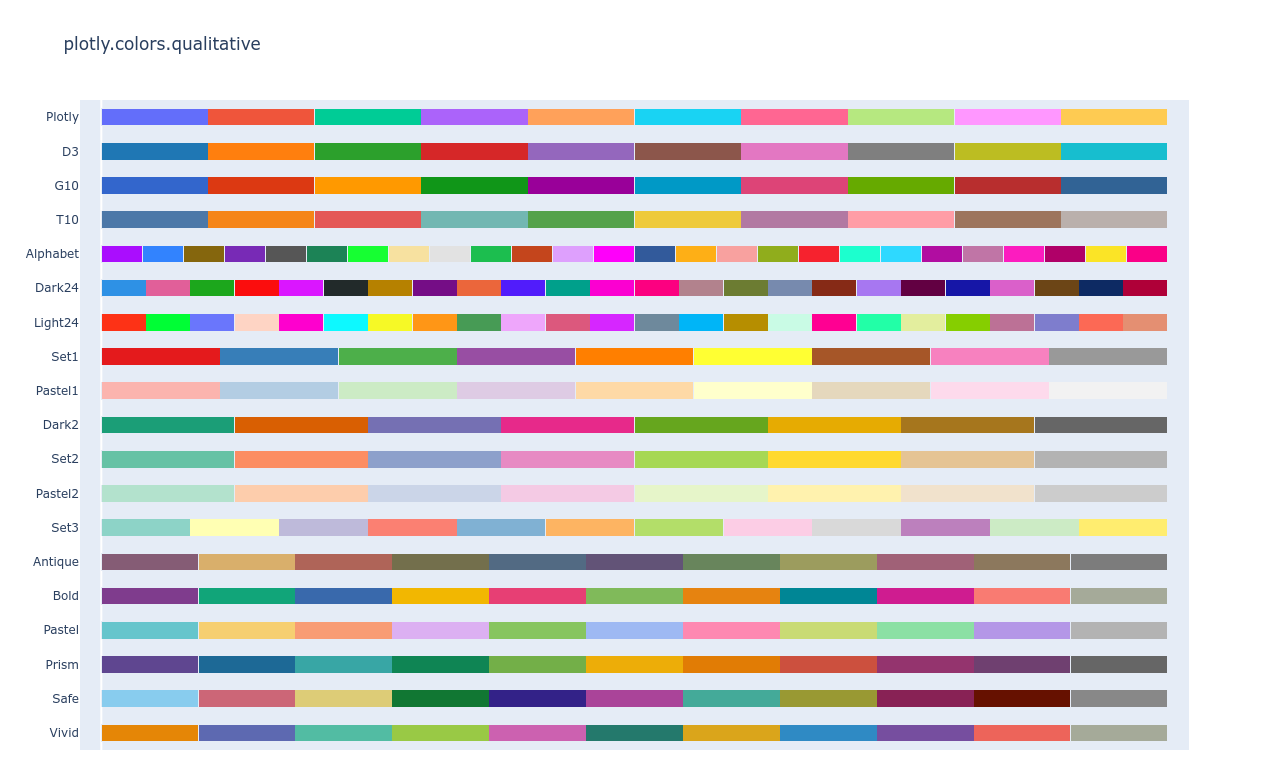

In [28]:
import plotly.express as px
px.colors.qualitative.swatches()

In [59]:
species_palette = px.colors.qualitative.Dark24
species_palette2 = px.colors.qualitative.Pastel1
species_palette3 = px.colors.qualitative.Set1


pca_symbols = {
    'An.gam': 'circle', 
    'An.col': 'circle',
    'GM-1': 'circle',
    'GM-2': 'circle',
    'GW': 'circle',
}


species_color_map = {
    'An.gam':  species_palette[19],
    'An.col': species_palette3[0],
    'GM-1': species_palette3[4],
    'GM-2': species_palette[2],
    'GW': species_palette2[2],
}

In [60]:
def plot_coords(
    data,
    x='PC1',
    y='PC2',
    z=None,
    color=None,
    color_map=None,
    color_continuous_scale=None,
    symbol=None,
    symbol_map=None,
    jitter_frac=0.02,
    title=None,
    marker_size=8,
    template='simple_white',
    slug=None,
    random_seed=42,
    show=False,
    ):

    # setup data
    data = data.copy()
    
    # add PC coords as dataframe columns, with jitter if desired
    if jitter_frac:
        np.random.seed(random_seed)
        data[x] = jitter(data[x], jitter_frac)
        data[y] = jitter(data[y], jitter_frac)
        if z:
            data[z] = jitter(data[z], jitter_frac)
    
    # setup common plotting arguments
    scatter_kwargs = dict(
        color=color, 
        color_discrete_map=species_color_map,
        color_continuous_scale=color_continuous_scale,
        symbol=symbol,
        symbol_map=pca_symbols,
        hover_name='sample_id',
        hover_data=[
            'species', 
            'country', 
            'location', 
            'year', 
            'latitude', 
            'longitude', 
            'sample_set',
            'aim_species_fraction_colu',
            'aim_fraction_arab'
        ],
        width=850,
        height=650,
        title=title,
        template=template,
    )
        
    config = dict({'scrollZoom': True})
    # hack fixed marker size, 2D only (3D has bugs)
    if marker_size and not z:
        data['size'] = marker_size
        scatter_kwargs['size'] = 'size'
        scatter_kwargs['size_max'] = marker_size
        scatter_kwargs['opacity'] = 0.9

    if z:
        # 3D scatter plot
        fig = px.scatter_3d(data, x=x, y=y, z=z, **scatter_kwargs)
        
    else:
        # 2D scatter plot
        fig = px.scatter(data, x=x, y=y, render_mode='svg', **scatter_kwargs)
        fig.update_layout(
        xaxis = dict(
            tickmode = 'array',
            tickvals = [-40, -30, -20, -10, 0, 10, 20, 30, 40]))
        fig.update_layout(
            yaxis = dict(
            tickmode = 'array',
            tickvals = [-40, -30, -20, -10, 0, 10])) #    ax.set_xlim(-120, 90)
                                                         #ax.set_ylim(-130, 60)
        
    if slug:
        path = f'plot-{slug}-{x}-{y}-{z}-{color}.html'
        fig.write_html(path, include_plotlyjs='cdn')
                
    if show:
        fig.show(config=config)
        #fig.savefig('pca_aims.png', jpeg_quality=100, dpi=300)

In [61]:
def jitter(a, f):
    r = a.max() - a.min()
    return a + f * np.random.uniform(-r, r, a.shape)

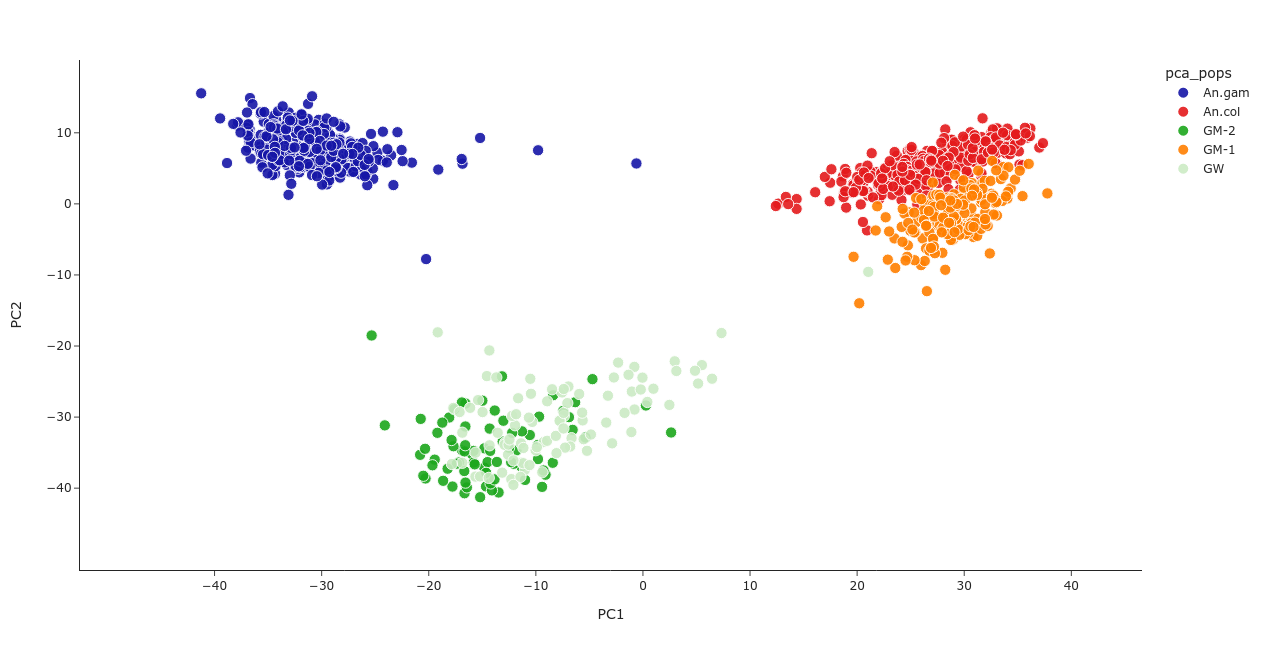

In [62]:
plot_coords(data, x='PC1', y='PC2',
            color='pca_pops', symbol='pca_pops', slug='pca',
            show=True)

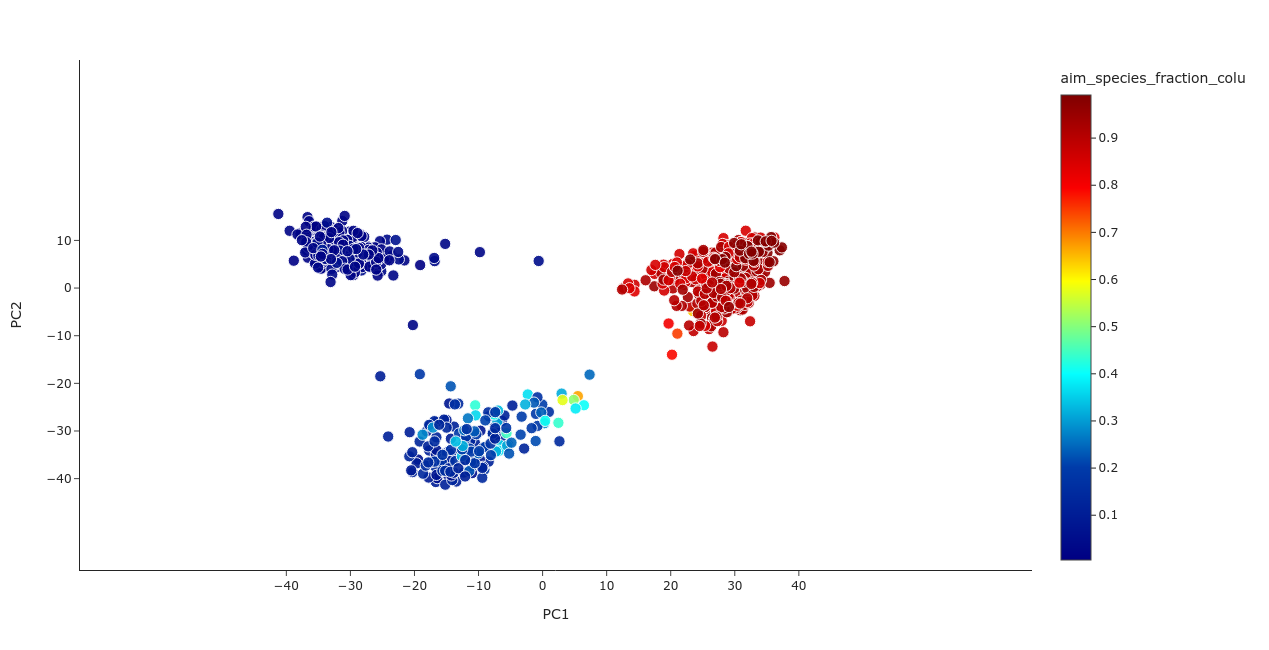

In [63]:
plot_coords(data, x='PC1', y='PC2',
            color='aim_species_fraction_colu', color_continuous_scale='jet', slug='pca',
            show=True)

In [70]:
   def plot_pca_coords_3d(
        data,
        x="PC1",
        y="PC2",
        z="PC3",
        color=None,
        symbol=None,
        jitter_frac=0.02,
        random_seed=42,
        width=850,
        height=650,
        marker_size=2,
        slug=None,
        show=False,

        **kwargs,
    ):
        data = data.copy()

        if jitter_frac:
            np.random.seed(random_seed)
            data[x] = jitter(data[x], jitter_frac)
            data[y] = jitter(data[y], jitter_frac)
            data[z] = jitter(data[z], jitter_frac)

        scatter_kwargs = dict(
        color=color, 
        color_discrete_map=species_color_map,
        #color_continuous_scale=color_continuous_scale,
        symbol=symbol,
        symbol_map=pca_symbols,
        hover_name='sample_id',
        hover_data=[
            'species', 
            'country', 
            'location', 
            'year', 
            'latitude', 
            'longitude', 
            'sample_set',
            'aim_fraction_colu',
            'aim_fraction_arab'
        ],
        width=850,
        height=650,
        #title=title,
        #template=template,
    )
        plot_kwargs = dict(
            width=width,
            height=height,
            hover_name="sample_id",
            hover_data=[
                        'species', 
                        'country', 
                        'location', 
                        'year', 
                        'latitude', 
                        'longitude', 
                        'sample_set',
                        'aim_fraction_colu',
                        'aim_fraction_arab'
                    ],            
            color=color,
            symbol=symbol,
        )
        fig = px.scatter_3d(data, x=x, y=y, z=z, **scatter_kwargs)
        fig.update_traces(marker={"size": marker_size})
        if slug:
                path = f'plot-{slug}-{x}-{y}-{z}-{color}.html'
                fig.write_html(path, include_plotlyjs='cdn')
        
        if show:
            fig.show()

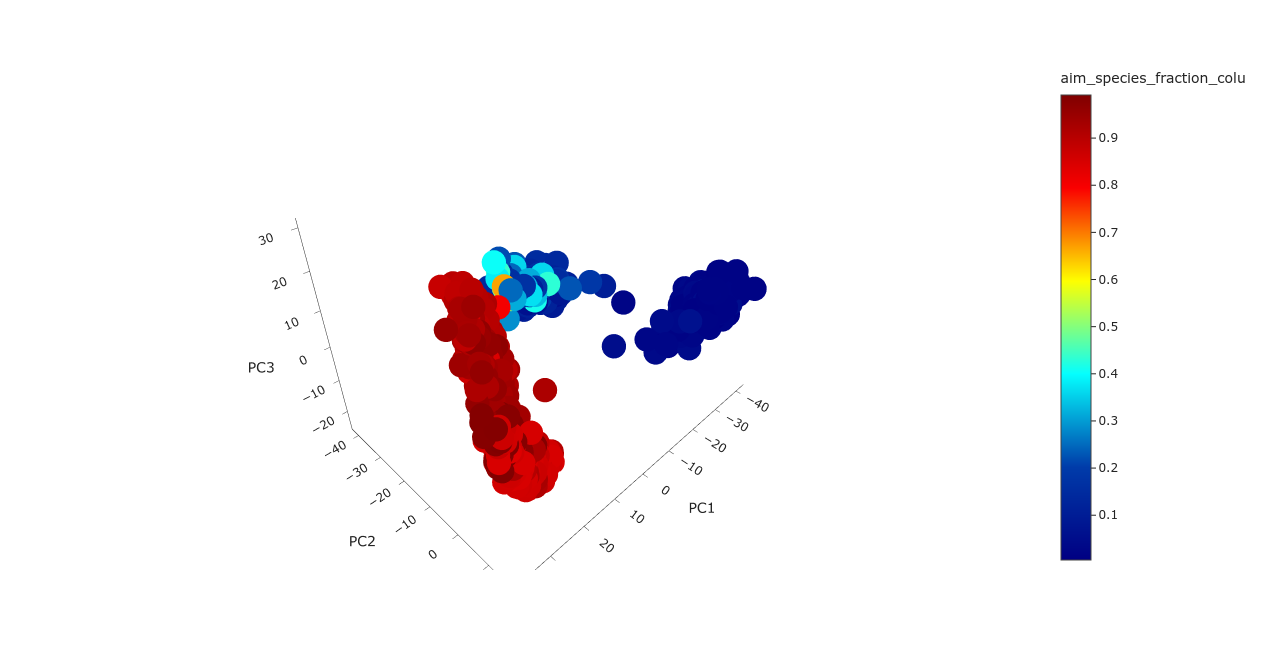

In [71]:
plot_coords(data, x='PC1', y='PC2', z='PC3',
            color='aim_species_fraction_colu', color_continuous_scale='jet', slug='pca',
            show=True)

-----------------------------------
## Ped file for admixture

In [24]:
from os.path import join, isdir, isfile
import sh

In [25]:
root_dir = "/home/randomx/notebooks/Far_West/phase3_adx"
wd = join(root_dir, "preprocessed_data", "PLINK_v1.07")
sh.mkdir("-p", wd)

In [26]:
def estimate_gdist(pos, table):
    which = np.searchsorted(table.pposition.tolist(), pos + 1)    
    gap = pos - table.iloc[which - 1].pposition
    rate = table.iloc[which - 1].rrate
    return np.round(table.iloc[which - 1].gposition + ((gap/1e6) * rate), 7)

In [27]:
def loadmap(path):
    mapdata = pd.read_csv(path, sep="\t", index_col=None)
    return mapdata

In [28]:
mapfn = join("admixture/map/Ag_{chrom}.map")

In [29]:
from anhima import loc, gt
import gzip

In [30]:
sex_d = {"F": "2", "M": "1", "UKN": "3"}
fstem = "{chrom}_{desc}_{start}_{stop}"

In [31]:
script_d = join(wd, "_script")
log_d = join(wd, "_log")
sh.mkdir("-p", script_d, log_d)

In [32]:
plink_cmd = """
#! /bin/bash

set -e 
set -o pipefail

cd {wd}
gunzip {file}.ped.gz {file}.map.gz
plink --noweb --file {file} --out {file}.ld --indep-pairwise {nsnps} {slide} {r2}

shuf -n 200000 {file}.ld.prune.in | sort > {file}.ld.prune.in.downsample

plink --noweb --file {file} --extract {file}.ld.prune.in.downsample \\
  --out {file}.ld.pruned --make-bed
plink --noweb --file {file} --extract {file}.ld.prune.in.downsample \\
  --out {file}.ld.pruned --recode

gzip {file}.ped {file}.map
"""

In [33]:
chrom = ["2R", '2L', '3R', '3L', 'X']

In [34]:
from itertools import compress

In [35]:
dat = pd.read_csv('../Data/Meta/west_africa_phase3_n2.csv', sep = ',', index_col=1).drop(columns='Unnamed: 0')
dat

partner_sample_id  contributor        country location  year  month  \
sample_id                                                                       
AB0085-Cx             BF2-4  Austin Burt   Burkina Faso     Pala  2012      7   
AB0086-Cx             BF2-6  Austin Burt   Burkina Faso     Pala  2012      7   
AB0087-C              BF3-3  Austin Burt   Burkina Faso     Bana  2012      7   
AB0088-C              BF3-5  Austin Burt   Burkina Faso     Bana  2012      7   
AB0089-Cx             BF3-8  Austin Burt   Burkina Faso     Bana  2012      7   
...                     ...          ...            ...      ...   ...    ...   
AJ0060-C             BIS038   Joao Pinto  Guinea-Bissau   Antula  2010     -1   
AJ0068-C             BIS046   Joao Pinto  Guinea-Bissau   Antula  2010     -1   
AJ0080-C             BIS058   Joao Pinto  Guinea-Bissau   Antula  2010     -1   
AJ0087-C             BIS065   Joao Pinto  Guinea-Bissau   Antula  2010     -1   
AJ0119-C             BIS097   Joao Pinto  Guinea-Bissau   Antula  2010     -1   

           longitude  latitude sex_call    sample_set  ... aim_fraction_arab  \
sample_id                                              ...                     
AB0085-Cx     -4.235    11.150        F  AG1000G-BF-A  ...               2.0   
AB0086-Cx     -4.235    11.150        F  AG1000G-BF-A  ...               2.0   
AB0087-C      -4.472    11.233        F  AG1000G-BF-A  ...               2.0   
AB0088-C      -4.472    11.233        F  AG1000G-BF-A  ...               2.0   
AB0089-Cx     -4.472    11.233        F  AG1000G-BF-A  ...               2.0   
...              ...       ...      ...           ...  ...               ...   
AJ0060-C     -15.582    11.891        F    AG1000G-GW  ...               6.0   
AJ0068-C     -15.582    11.891        F    AG1000G-GW  ...               6.0   
AJ0080-C     -15.582    11.891        F    AG1000G-GW  ...               5.0   
AJ0087-C     -15.582    11.891        F    AG1000G-GW  ...               6.0   
AJ0119-C     -15.582    11.891        F    AG1000G-GW  ...               6.0   

           species_gambcolu_arabiensis  species_gambiae_coluzzii  \
sample_id                                                          
AB0085-Cx                    gamb_colu                   gambiae   
AB0086-Cx                    gamb_colu                   gambiae   
AB0087-C                     gamb_colu                  coluzzii   
AB0088-C                     gamb_colu                  coluzzii   
AB0089-Cx                    gamb_colu                  coluzzii   
...                                ...                       ...   
AJ0060-C                     gamb_colu              intermediate   
AJ0068-C                     gamb_colu              intermediate   
AJ0080-C                     gamb_colu              intermediate   
AJ0087-C                     gamb_colu              intermediate   
AJ0119-C                     gamb_colu              intermediate   

                                 species  \
sample_id                                  
AB0085-Cx                        gambiae   
AB0086-Cx                        gambiae   
AB0087-C                        coluzzii   
AB0088-C                        coluzzii   
AB0089-Cx                       coluzzii   
...                                  ...   
AJ0060-C   intermediate_gambiae_coluzzii   
AJ0068-C   intermediate_gambiae_coluzzii   
AJ0080-C   intermediate_gambiae_coluzzii   
AJ0087-C   intermediate_gambiae_coluzzii   
AJ0119-C   intermediate_gambiae_coluzzii   

                                                      locspe population  \
sample_id                                                                 
AB0085-Cx                     2012_Burkina Faso_Pala_gambiae    SBF1_12   
AB0086-Cx                     2012_Burkina Faso_Pala_gambiae    SBF1_12   
AB0087-C                     2012_Burkina Faso_Bana_coluzzii    MBF2_12   
AB0088-C                     2012_Burkina Faso_Bana_coluzzii    MBF2_12   
AB0089-

In [36]:
fh_samples = [str(s) for s in dat.index]

In [37]:
from allel import chunked

In [20]:
from allel import chunked
callset_fn = '../Data/Extras/chrom_X-spe_west.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "chrom_X-spe_west.h5" (mode r)>

In [21]:
g_tot = allel.GenotypeChunkedArray(callset['X']['calldata'])
g_tot

<GenotypeChunkedArray shape=(47085, 1190, 2) dtype=int8 chunks=(440, 1190, 2)
   nbytes=106.9M cbytes=107.9M cratio=1.0
   values=h5py._hl.dataset.Dataset>

In [26]:
fn = ("../Data/Extras/chrom_X-spe_west.ped.gz")
with gzip.open(fn, "wb") as gz:
    for i, sid in enumerate(fh_samples):
        sex = sex_d[dat.loc[sid].sex_call]
        geno = np.array(g_tot[:, i] + 1)
        geno_str = " ".join(np.apply_along_axis(" ".join, 1, geno.astype("str")))
        line = " ".join([sid, sid, "0", "0", sex, "0", geno_str]) + "\n"
        gz.write(line.encode())

------------------------------
## sandbox

In [104]:
meta_ag3 = meta

In [24]:
df = pd.read_csv('../Data/Meta/west_africa_phase3_n2.csv').drop(columns=['Unnamed: 0'])

In [5]:
df

sample_id partner_sample_id  contributor        country location  year  \
0     AB0085-Cx             BF2-4  Austin Burt   Burkina Faso     Pala  2012   
1     AB0086-Cx             BF2-6  Austin Burt   Burkina Faso     Pala  2012   
2      AB0087-C             BF3-3  Austin Burt   Burkina Faso     Bana  2012   
3      AB0088-C             BF3-5  Austin Burt   Burkina Faso     Bana  2012   
4     AB0089-Cx             BF3-8  Austin Burt   Burkina Faso     Bana  2012   
...         ...               ...          ...            ...      ...   ...   
1185   AJ0060-C            BIS038   Joao Pinto  Guinea-Bissau   Antula  2010   
1186   AJ0068-C            BIS046   Joao Pinto  Guinea-Bissau   Antula  2010   
1187   AJ0080-C            BIS058   Joao Pinto  Guinea-Bissau   Antula  2010   
1188   AJ0087-C            BIS065   Joao Pinto  Guinea-Bissau   Antula  2010   
1189   AJ0119-C            BIS097   Joao Pinto  Guinea-Bissau   Antula  2010   

      month  longitude  latitude sex_call  ... aim_fraction_arab  \
0         7     -4.235    11.150        F  ...               2.0   
1         7     -4.235    11.150        F  ...               2.0   
2         7     -4.472    11.233        F  ...               2.0   
3         7     -4.472    11.233        F  ...               2.0   
4         7     -4.472    11.233        F  ...               2.0   
...     ...        ...       ...      ...  ...               ...   
1185     -1    -15.582    11.891        F  ...               6.0   
1186     -1    -15.582    11.891        F  ...               6.0   
1187     -1    -15.582    11.891        F  ...               5.0   
1188     -1    -15.582    11.891        F  ...               6.0   
1189     -1    -15.582    11.891        F  ...               6.0   

     species_gambcolu_arabiensis  species_gambiae_coluzzii  \
0                      gamb_colu                   gambiae   
1                      gamb_colu                   gambiae   
2                      gamb_colu                  coluzzii   
3                      gamb_colu                  coluzzii   
4                      gamb_colu                  coluzzii   
...                          ...                       ...   
1185                   gamb_colu              intermediate   
1186                   gamb_colu              intermediate   
1187                   gamb_colu              intermediate   
1188                   gamb_colu              intermediate   
1189                   gamb_colu              intermediate   

                            species  \
0                           gambiae   
1                           gambiae   
2                          coluzzii   
3                          coluzzii   
4                          coluzzii   
...                             ...   
1185  intermediate_gambiae_coluzzii   
1186  intermediate_gambiae_coluzzii   
1187  intermediate_gambiae_coluzzii   
1188  intermediate_gambiae_coluzzii   
1189  intermediate_gambiae_coluzzii   

                                                 locspe population 2La_type  \
0                        2012_Burkina Faso_Pala_gambiae    SBF1_12  2La_alt   
1                        2012_Burkina Faso_Pala_gambiae    SBF1_12  2La_alt   
2                       2012_Burkina Faso_Bana_coluzzii    MBF2_12  2La_alt   
3                       2012_Burkina Faso_Bana_coluzzii    MBF2_12  2La_alt   
4                       2012_Burkina Faso_Bana_coluzzii    MBF2_12  2La_alt   
...                                                 ...        ...      ...   
1185  2010_Guinea-Bissau_Antula_intermediate_gambiae...        FW2  2La_hom   
1186  2010_Guinea-Bissau_Antula_intermediate_gambiae...        FW2  2La_het   
1187  2010_Guinea-Bissau_Antula_intermediate_gambiae...        FW2  2La_het   
1188  2010_Guinea-Bissau_Antula_intermediate_gambiae...        FW2  2La_het   
1189  2010_Guinea-Bissau_Antula_intermediate_gambiae...        FW2  2La_hom   

     2Rd_type pca_pops pca_country  
0     2Rd_hom   An.gam      

In [123]:
data = df.set_index('sample_id').join(meta_ag3.set_index('sample_id'), lsuffix='_left', rsuffix='_right').reset_index()
data

sample_id partner_sample_id_left contributor_left   country_left  \
0     AB0085-Cx                  BF2-4      Austin Burt   Burkina Faso   
1     AB0086-Cx                  BF2-6      Austin Burt   Burkina Faso   
2      AB0087-C                  BF3-3      Austin Burt   Burkina Faso   
3      AB0088-C                  BF3-5      Austin Burt   Burkina Faso   
4     AB0089-Cx                  BF3-8      Austin Burt   Burkina Faso   
...         ...                    ...              ...            ...   
1185   AJ0060-C                 BIS038       Joao Pinto  Guinea-Bissau   
1186   AJ0068-C                 BIS046       Joao Pinto  Guinea-Bissau   
1187   AJ0080-C                 BIS058       Joao Pinto  Guinea-Bissau   
1188   AJ0087-C                 BIS065       Joao Pinto  Guinea-Bissau   
1189   AJ0119-C                 BIS097       Joao Pinto  Guinea-Bissau   

     location_left  year_left  month_left  longitude_left  latitude_left  \
0             Pala       2012           7          -4.235         11.150   
1             Pala       2012           7          -4.235         11.150   
2             Bana       2012           7          -4.472         11.233   
3             Bana       2012           7          -4.472         11.233   
4             Bana       2012           7          -4.472         11.233   
...            ...        ...         ...             ...            ...   
1185        Antula       2010          -1         -15.582         11.891   
1186        Antula       2010          -1         -15.582         11.891   
1187        Antula       2010          -1         -15.582         11.891   
1188        Antula       2010          -1         -15.582         11.891   
1189        Antula       2010          -1         -15.582         11.891   

     sex_call_left  ...                    aim_species country_ISO  \
0                F  ...                        gambiae         BFA   
1                F  ...                        gambiae         BFA   
2                F  ...                       coluzzii         BFA   
3                F  ...                       coluzzii         BFA   
4                F  ...                       coluzzii         BFA   
...            ...  ...                            ...         ...   
1185             F  ...  intermediate_gambiae_coluzzii         GNB   
1186             F  ...  intermediate_gambiae_coluzzii         GNB   
1187             F  ...  intermediate_gambiae_coluzzii         GNB   
1188             F  ...  intermediate_gambiae_coluzzii         GNB   
1189             F  ...  intermediate_gambiae_coluzzii         GNB   

          adm1_name  adm1_ISO                 adm2_name     taxon  \
0     Hauts-Bassins     BF-09                     Houet   gambiae   
1     Hauts-Bassins     BF-09                     Houet   gambiae   
2     Hauts-Bassins     BF-09                     Houet  coluzzii   
3     Hauts-Bassins     BF-09                     Houet  coluzzii   
4     Hauts-Bassins     BF-09                     Houet  coluzzii   
...             ...       ...                       ...       ...   
1185         Bissau     GW-BS  Bissau Autonomous Sector      gcx1   
1186         Bissau     GW-BS  Bissau Autonomous Sector      gcx1   
1187         Bissau     GW-BS  Bissau Autonomous Sector      gcx1   
1188         Bissau     GW-BS  Bissau Autonomous Sector      gcx1   
1189         Bissau     GW-BS  Bissau Autonomous Sector      gcx1   

     cohort_admin1_year cohort_admin1_month  \
0       BF-09_gamb_2012  BF-09_gamb_2012_07   
1       BF-09_gamb_2012  BF-09_gamb_2012_07   
2       BF-09_colu_2012  BF-09_colu_2012_07   
3       BF-09_colu_2012  BF-09_colu_2012_07   
4       BF-09_colu_2012  BF-09_colu_2012_07   
...                 ...                 ...   
1185    GW-BS_gcx1_2010     GW-BS_gcx1_2010   
1186    GW-BS_gcx1_2010     GW-BS_gcx1_2010   
1187    GW-BS_gcx1_2010     GW-BS_gcx1_2010   
1188    GW-BS_gcx1_2010     GW-BS_gcx1_2010   
1189    GW-BS_gcx

In [147]:
data.to_csv('meta_merged.csv')

-------------------------

In [23]:
df

species pca_country  coluzzii  gambiae  intermediate_gambiae_coluzzii  \
0             BFcol       135        0                              0   
1             BFgam         0      157                              0   
2             CIcol        80        0                              0   
3             GHcol        63        0                              0   
4             GHgam         0       36                              0   
5              GM-1       167        0                             30   
6              GM-2         0       67                             10   
7             GNcol        11        0                              0   
8             GNgam         0      123                              0   
9                GW         0       21                             72   
10            GWgam         0        8                              0   
11            MAcol        85        0                              0   
12            MAgam         0      125                              0   

species Population  An. coluzzii  An. gambiae  
0            BFcol           135            0  
1            BFgam             0          157  
2            CIcol            80            0  
3            GHcol            63            0  
4            GHgam             0           36  
5             GM-1           167            0  
6             GM-2             0           67  
7            GNcol            11            0  
8            GNgam             0          123  
9               GW             0           21  
10           GWgam             0            8  
11           MAcol            85            0  
12           MAgam             0          125

In [10]:
df_summary = df.pivot_table(
    index=["pca_country"], 
    columns=["species"],
    values="sample_id", 
    aggfunc=len,
    fill_value=0)
df_summary

species      coluzzii  gambiae  intermediate_gambiae_coluzzii
pca_country                                                  
BFcol             135        0                              0
BFgam               0      157                              0
CIcol              80        0                              0
GHcol              63        0                              0
GHgam               0       36                              0
GM-1              167        0                             30
GM-2                0       67                             10
GNcol              11        0                              0
GNgam               0      123                              0
GW                  0       21                             72
GWgam               0        8                              0
MAcol              85        0                              0
MAgam               0      125                              0

In [15]:
df = df_summary.reset_index()
df['Population'] = df['pca_country']
df['An. coluzzii'] = df['coluzzii']
df['An. gambiae'] = df['gambiae']

In [17]:
df[['Population', 'An. gambiae', 'An. coluzzii', 'intermediate_gambiae_coluzzii']]

species Population  An. gambiae  An. coluzzii  intermediate_gambiae_coluzzii
0            BFcol            0           135                              0
1            BFgam          157             0                              0
2            CIcol            0            80                              0
3            GHcol            0            63                              0
4            GHgam           36             0                              0
5             GM-1            0           167                             30
6             GM-2           67             0                             10
7            GNcol            0            11                              0
8            GNgam          123             0                              0
9               GW           21             0                             72
10           GWgam            8             0                              0
11           MAcol            0            85                              0
12           MAgam          125             0                              0

In [25]:
df_summary = df.pivot_table(
    index=["pca_country","location"], 
    columns=["species"],
    values="sample_id", 
    aggfunc=len,
    fill_value=0)
df_summary

species                      coluzzii  gambiae  intermediate_gambiae_coluzzii
pca_country location                                                         
BFcol       Bana                   89        0                              0
            Pala                   11        0                              0
            Souroukoudinga         35        0                              0
BFgam       Bana                    0       37                              0
            Monomtenga              0       13                              0
            Pala                    0       64                              0
            Souroukoudinga          0       43                              0
CIcol       Tiassale               80        0                              0
GHcol       Madina                 14        0                              0
            Takoradi               24        0                              0
            Twifo Praso            25        0                              0
GHgam       Koforidua               0       23                              0
            Madina                  0       13                              0
GM-1        Njabakunda              5        0                              1
            Tankular               14        0                              5
            Wali Kunda            148        0                             24
GM-2        Njabakunda              0       58                             10
            Sare Samba Sowe         0        9                              0
GNcol       Koundara               11        0                              0
GNgam       Koraboh                 0       60                              0
            Koundara                0       63                              0
GW          Antula                  0       15                             45
            Safim                   0        6                             27
GWgam       Leibala                 0        8                              0
MAcol       Douna                  19        0                              0
            Fanzana                 6        0                              0
            Kababougou             12        0                              0
            Moribobougou            7        0                              0
            Ouassorola              9        0                              0
            Takan                  26        0                              0
            Tieneguebougou          6        0                              0
MAgam       Bancoumana              0        9                              0
            Kababougou              0       28                              0
            Kela                    0       23                              0
            Takan                   0        5                              0
            Toumani Oulena          0       60                              0